In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 8.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# change file path here
df=pd.read_csv("Desktop/internship/study/data_application-of-TTIs_28:06.csv")

In [4]:
df.columns

Index(['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'SO01', 'SO03',
       'SO04', 'SO05', 'SO06', 'SO07', 'SO09', 'SO10', 'SO13', 'SO14', 'ST01',
       'ST03', 'ST04', 'ST05', 'ST06', 'ST07', 'ST09', 'ST10', 'ST13', 'ST14',
       'TIME001', 'TIME002', 'TIME003', 'TIME004', 'TIME_SUM', 'MAILSENT',
       'LASTDATA', 'FINISHED', 'Q_VIEWER', 'LASTPAGE', 'MAXPAGE', 'MISSING',
       'MISSREL', 'TIME_RSI'],
      dtype='object')

In [5]:
df.head()

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,SO01,SO03,SO04,SO05,...,TIME_SUM,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI
0,7,NaN,NaN,base,interview,2024-06-17 12:36:04,2,1,4,5,...,4696,NaN,2024-06-17 13:54:20,1,0,4,4,0,0,NaN
1,2,NaN,NaN,base,interview,2024-06-17 17:13:54,4,3,2,2,...,3811,NaN,2024-06-17 18:17:26,1,0,4,4,0,0,NaN
2,16,NaN,NaN,base,interview,2024-06-19 13:55:02,4,5,1,1,...,3128,NaN,2024-06-19 14:47:10,1,0,4,4,0,0,NaN


In [12]:
x_labels=["SO01", "ST01", "SO03", "ST03", "SO04", "ST04", "SO05", "ST05", "SO06", "ST06", "SO07", "ST07", "SO09", "ST09", "SO10", "ST10", "SO13", "ST13", "SO14", "ST14"]
selected_data = df[x_labels]

# Calculate mean and standard deviation
means = selected_data.mean()
sd = selected_data.std()
print("Var   Mean  Standard Deviation")
for col in selected_data:
    print(f"{col}: {means[col]:.2f} ({sd[col]})")



Var   Mean  Standard Deviation
SO01: 3.50 (1.0)
ST01: 2.25 (0.5)
SO03: 3.25 (1.707825127659933)
ST03: 3.50 (1.7320508075688772)
SO04: 2.75 (1.5)
ST04: 2.75 (1.5)
SO05: 2.25 (1.8929694486000912)
ST05: 3.75 (0.5)
SO06: 4.25 (0.9574271077563381)
ST06: 4.00 (0.816496580927726)
SO07: 3.50 (1.0)
ST07: 2.50 (0.5773502691896257)
SO09: 3.25 (1.707825127659933)
ST09: 3.25 (0.9574271077563381)
SO10: 3.25 (1.2583057392117916)
ST10: 3.50 (1.0)
SO13: 4.00 (0.816496580927726)
ST13: 4.25 (0.9574271077563381)
SO14: 4.00 (0.816496580927726)
ST14: 4.50 (0.5773502691896257)


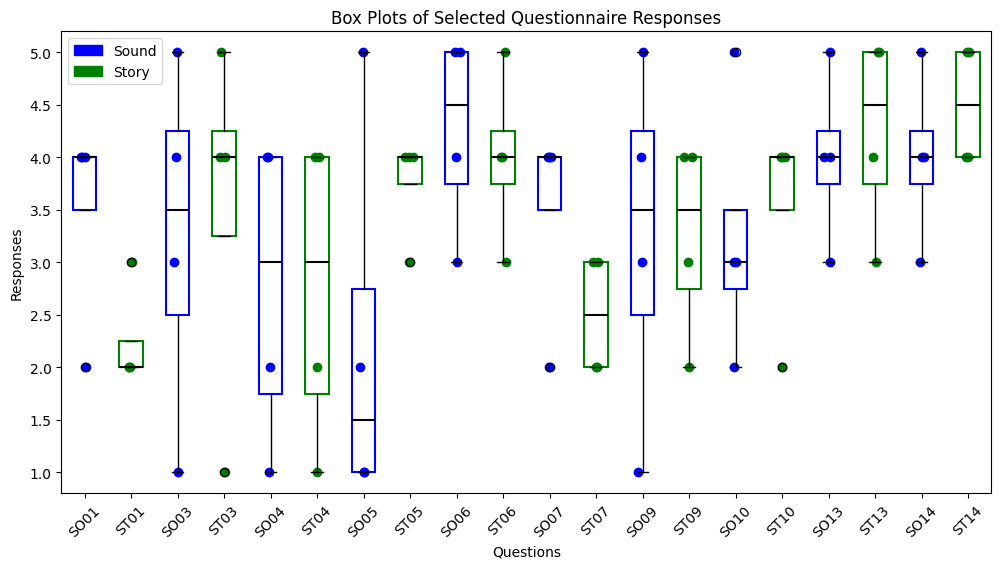

In [13]:


# Create a box plot for the selected columns
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(selected_data,patch_artist=True)
plt.title('Box Plots of Selected Questionnaire Responses')
plt.xlabel('Questions')
plt.ylabel('Responses')
ax.set_xticklabels(x_labels, rotation=45)

colors = ['blue','green']

for i, d in enumerate(selected_data):
   y_sca = selected_data[d]
   x_sca = np.random.normal(i + 1, 0.04, len(y))
   plt.scatter(x_sca, y_sca, color=colors[i%2]) #change color if it gets too visually confusing

# fill with colors
for i, box in enumerate(bp['boxes']):
    box.set_edgecolor(colors[i % 2])
    box.set_linewidth(1.5)
    box.set_facecolor('none')
for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

# create legend
so_legend = mpatches.Patch(color=colors[0], label='Sound')
st_legend = mpatches.Patch(color=colors[1], label='Story')

plt.legend(handles=[so_legend, st_legend])

#show plot
plt.show()

/var/folders/h9/mrbmcdkm8xjf6s0059bg5vv00000gs/T/ipykernel_12230/2872819538.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.errorbar(x_indices[so_indices], means[so_indices], yerr=sd[so_indices], fmt='o', color='blue', linewidth=2, capsize=6, label='Sound')
/var/folders/h9/mrbmcdkm8xjf6s0059bg5vv00000gs/T/ipykernel_12230/2872819538.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.errorbar(x_indices[st_indices], means[st_indices], yerr=sd[st_indices], fmt='o', color='green', linewidth=2, capsize=6, label='Story')


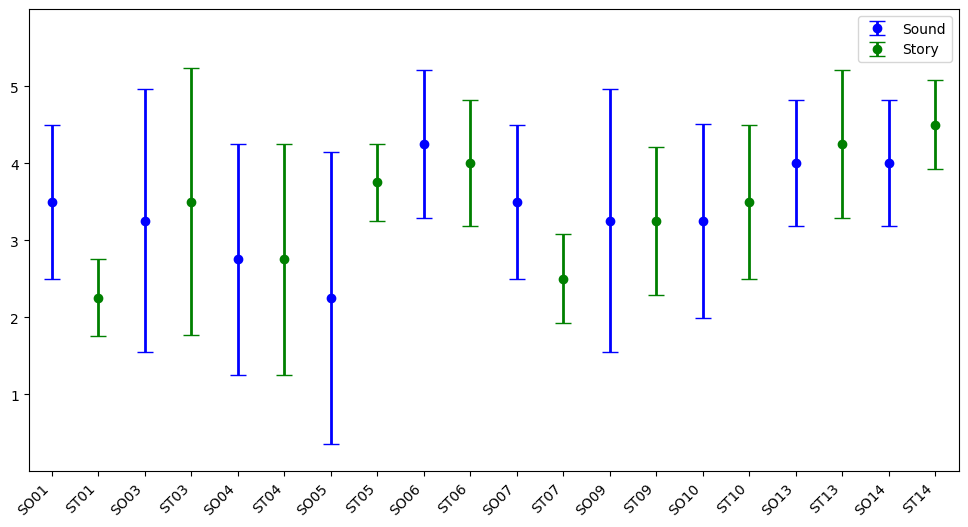

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Determine indices for SO and ST
so_indices = np.arange(0, len(means), 2)  # Indices for SO (0, 2, 4, ...)
st_indices = np.arange(1, len(means), 2)  # Indices for ST (1, 3, 5, ...)
x_indices = np.arange(len(x_labels))

# Plot SO data with blue error bars
ax.errorbar(x_indices[so_indices], means[so_indices], yerr=sd[so_indices], fmt='o', color='blue', linewidth=2, capsize=6, label='Sound')

# Plot ST data with green error bars
ax.errorbar(x_indices[st_indices], means[st_indices], yerr=sd[st_indices], fmt='o', color='green', linewidth=2, capsize=6, label='Story')

# Set axis limits and ticks
ax.set(xlim=(-0.5, len(means) - 0.5), xticks=np.arange(len(means)),
       ylim=(0, 6), yticks=np.arange(1, 6))

# Set x-axis labels
ax.set_xticklabels(x_labels, rotation=45, ha='right')


# Add legend
ax.legend()

# Show plot
plt.show()